In [2]:
import numpy as np
import pandas as pd
import sklearn

import os
import cv2
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image
from sklearn.preprocessing import StandardScaler
import seaborn as sns




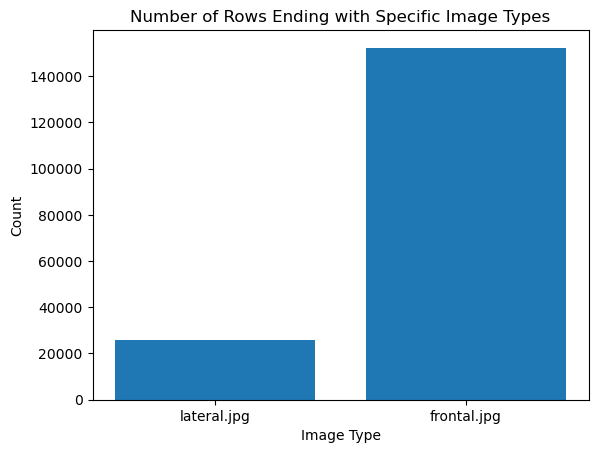

In [5]:
df = pd.read_csv("labels/labels.csv")

# First, you would filter the 'path' column to count the occurrences:
lateral_count = df['Path'].str.endswith('lateral.jpg').sum()
frontal_count = df['Path'].str.endswith('frontal.jpg').sum()

# Now, create a bar chart:
labels = ['lateral.jpg', 'frontal.jpg']
counts = [lateral_count, frontal_count]

plt.bar(labels, counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Number of Rows Ending with Specific Image Types')
plt.show()

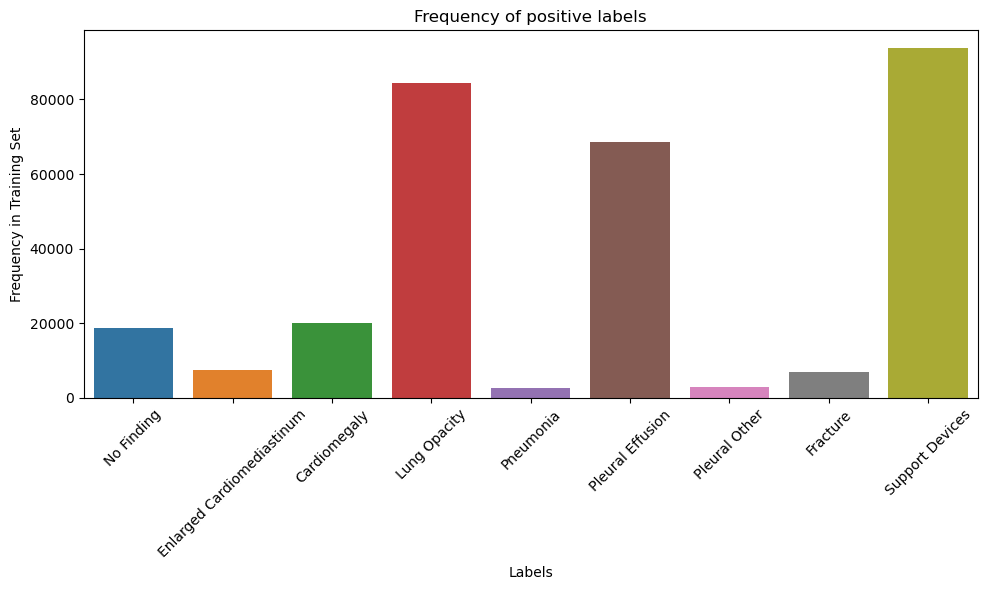

In [6]:
df_a = pd.read_csv("labels/labels.csv")
labels_of_interest = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Pneumonia', 
                      'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
df = df_a[labels_of_interest]


label_counts = df.apply(lambda x: (x == 1.0).sum())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Frequency of positive labels')
plt.xlabel('Labels')
plt.ylabel('Frequency in Training Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

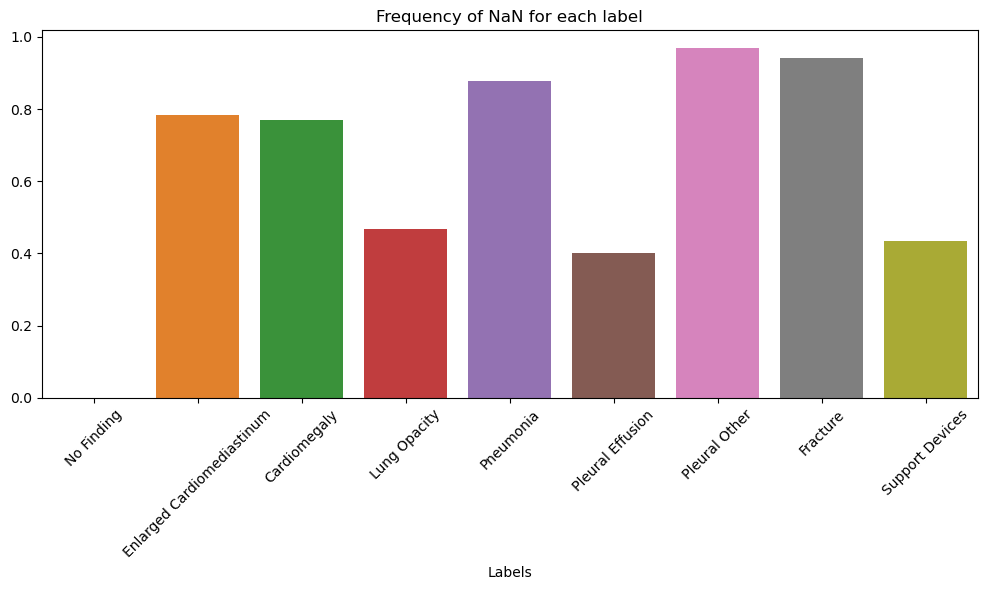

In [7]:
df_a = pd.read_csv("labels/labels.csv")
labels_of_interest = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Pneumonia', 
                      'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
df = df_a[labels_of_interest]


label_counts = df.apply(lambda x: (pd.isna(x)).sum()) / df.shape[0]


# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Frequency of NaN for each label')
plt.xlabel('Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df_a

,Unnamed: 0.1,Unnamed: 0,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Pneumonia,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0,0,train/pid50512/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,1,train/pid21580/study2/view1_frontal.jpg,Female,87,Frontal,AP,-1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN
2,2,2,train/pid21580/study1/view1_frontal.jpg,Female,83,Frontal,AP,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
3,3,3,train/pid21580/study1/view2_lateral.jpg,Female,83,Lateral,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
4,4,4,train/pid33839/study1/view1_frontal.jpg,Male,41,Frontal,AP,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178153,178153,223409,train/pid16708/study2/view1_frontal.jpg,Male,59,Frontal,AP,-1.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN
178154,178154,223410,train/pid16708/study1/view1_frontal.jpg,Male,59,Frontal,AP,0.0,NaN,NaN,0.0,-1.0,0.0,NaN,NaN,NaN
178155,178155,223411,train/pid32381/study1/view1_frontal.jpg,Female,0,Frontal,AP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178156,178156,223412,train/pid25865/study1/view1_frontal.jpg,Female,0,Frontal,AP,-1.0,NaN,1.0,1.0,0.0,NaN,NaN,NaN,-1.0


In [10]:
dummy_labels = pd.read_csv("sample_submission.csv")

In [16]:
dummy_labels["No Finding"] = df_a["No Finding"].mean(skipna=True) + 0.01
dummy_labels["Enlarged Cardiomediastinum"] = df_a["Enlarged Cardiomediastinum"].mean(skipna=True)
dummy_labels["Cardiomegaly"] = df_a["Cardiomegaly"].mean(skipna=True) - 0.03
dummy_labels["Lung Opacity"] = df_a["Lung Opacity"].mean(skipna=True) - 0.01
dummy_labels["Pneumonia"] = df_a["Pneumonia"].mean(skipna=True) + 0.01
dummy_labels["Pleural Effusion"] = df_a["Pleural Effusion"].mean(skipna=True)
dummy_labels["Pleural Other"] = df_a["Pleural Other"].mean(skipna=True) - 0.01
dummy_labels["Fracture"] = df_a["Fracture"].mean(skipna=True) - 0.01
dummy_labels["Support Devices"] = df_a["Support Devices"].mean(skipna=True)

In [17]:
dummy_labels.to_csv('dummy_submission.csv', index=False)  # You can specify the same path to overwrite the original file

In [53]:
labels_df = pd.read_csv('labels/labels.csv')
a = labels_df.iloc[0]

a[3:]

Path                          train/pid50512/study1/view1_frontal.jpg
Sex                                                            Female
Age                                                                68
Frontal/Lateral                                               Frontal
AP/PA                                                              AP
No Finding                                                        1.0
Enlarged Cardiomediastinum                                        NaN
Cardiomegaly                                                      NaN
Lung Opacity                                                      NaN
Pneumonia                                                         NaN
Pleural Effusion                                                  NaN
Pleural Other                                                     NaN
Fracture                                                          NaN
Support Devices                                                   1.0
Name: 0, dtype: obje

In [81]:
transform = transforms.Compose([
    transforms.Resize((250, 250)),
    transforms.ToTensor()
])

labels_df = pd.read_csv('labels/labels.csv')
 
age_mean = labels_df['Age'].mean()
age_std = labels_df['Age'].std()

X = []
y = []
to_drop = []  


for index, row in labels_df.iterrows():
    img_path = row['Path']

    # keep this for later
    # should do a different dataset for lateral, to train
    if img_path.endswith('lateral.jpg'):
        to_drop.append(index)
        continue
    
    if not os.path.exists(img_path):
        to_drop.append(index)
        continue  

    age = (row['Age'] - age_mean) / age_std
    gender = 1.0 if row['Sex'] == 'Male' else 0.0

    image = Image.open(img_path)
    image = transform(image)

    X.append((image, age, gender))

    label = row[7:].to_numpy() 
    label = [0.1 if pd.isna(x) else 0 if x == -1.0 else 0.5 if x == 0.0 else x for x in label]
    y.append(label)

labels_df = labels_df.drop(index=to_drop).reset_index(drop=True)

In [82]:
image_tensors = torch.stack([item[0] for item in X])

features_tensors = torch.tensor([(item[1], item[2]) for item in X], dtype=torch.float32)

label_tensors = torch.tensor(y, dtype=torch.float32)

X = image_tensors
y = label_tensors

In [86]:
len(y)
len(X)

560